https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR


In [2]:
data = [
    967,795,820,672,722,820,1326,1262,1126,814,821,918,950,878,785,690,794,802,1445,1357,1268,889,830,935
]

# Tạo mảng numpy.array từ dữ liệu GDP
elec_array = np.array(data)

# In ra mảng để kiểm tra
print(elec_array)

[ 967  795  820  672  722  820 1326 1262 1126  814  821  918  950  878
  785  690  794  802 1445 1357 1268  889  830  935]


In [3]:
lag = 1  # Độ trễ 1

X = []
y = []

# Tạo dữ liệu đầu vào (X) và dữ liệu mục tiêu (y)
for i in range(len(elec_array) - lag):
    X.append(elec_array[i:i + lag])
    y.append(elec_array[i + lag])

# Chuyển đổi X và y thành mảng numpy.array
X = np.array(X)
y = np.array(y)

# Chuẩn hóa dữ liệu
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Tạo mô hình SVR
svr_model = SVR(C=1.0, epsilon=0.1, kernel='rbf')

# Huấn luyện mô hình
svr_model.fit(X_train, y_train)

# Dự báo trên tập kiểm tra
y_pred = svr_model.predict(X_test)



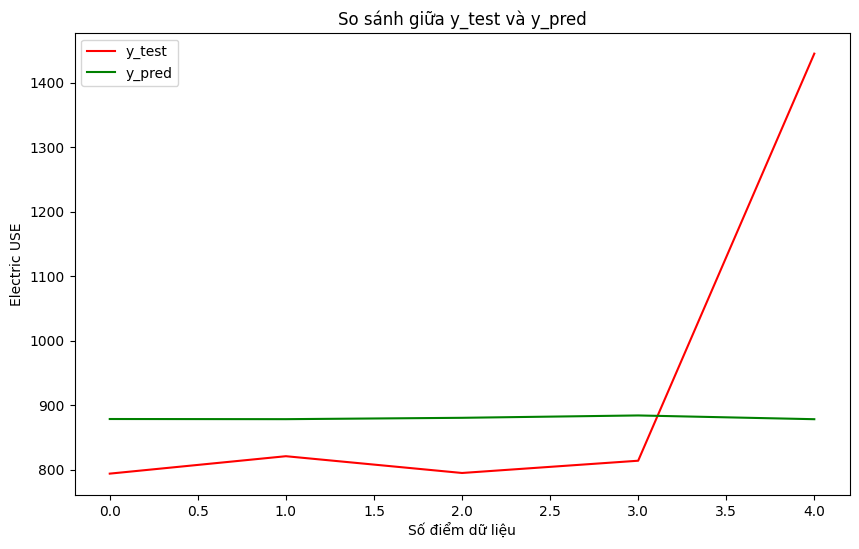

In [4]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ giá trị thực (y_test)
plt.plot(y_test, label='y_test', color='red')

# Vẽ giá trị dự đoán (y_pred)
plt.plot(y_pred, label='y_pred', color='green' )

# Thêm tiêu đề và nhãn trục
plt.title('So sánh giữa y_test và y_pred')
plt.xlabel('Số điểm dữ liệu')
plt.ylabel('Electric USE')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Tính SSE (Sum of Squared Errors)
sse = np.sum((y_test - y_pred) ** 2)
print("Sum of Squared Errors (SSE):", sse)

# Tính R-squared (Hệ số xác định)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

Mean Squared Error: 68756.86109300688
Sum of Squared Errors (SSE): 343784.30546503444
R-squared: -0.050650850965293204


In [7]:


# Tính RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

# Tính MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Tính MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)



Root Mean Squared Error (RMSE): 262.21529530713286
Mean Absolute Error (MAE): 172.88398781602797
Mean Absolute Percentage Error (MAPE): 15.249810271491068
